This notebook contains example of cross-correlation time delay calculation between Fermi-GBM and Konus-Wind for GRB 200415A.

Fermi-GBM lightcurve is a sum of n0, n1, n2, n3, n4, n5, n9, and na produced with
gbm_tte.py from
https://github.com/dsvinkin/GCNmegaphone

In [3]:
import os
import sys

# Fill in your local path to the code 
sys.path.append('c:/work/IPN_triangulation/Triangulation_py/triangulation_/')

import numpy as np

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from triangulation.ipn_project import IPN_project
from triangulation.data import gbm_thr_file, kw_thr_file
from triangulation.plot import Plot
from triangulation.correlate import correlate, get_dTcc
from triangulation.plot_cc import plot_cc

In [6]:
# Set path to the data and the IPN GRB name
data_path ='../test_data/'
grb_name = 'GRB20200415_T31685'

# IPN_project object contains inforamtion about intstrument data files
prj = IPN_project(data_path, grb_name)
print(prj)

Data in ../test_data/GRB20200415_T31685:
Konus      Konus-Wind files:
../test_data/GRB20200415_T31685\kw20200415_31681.info
THR:
2000 us ../test_data/GRB20200415_T31685\kw20200415_31681_rc2.thr
EPH: ../test_data/GRB20200415_T31685\20200415_Wind.eph
GBM        Fermi-GBM files:
../test_data/GRB20200415_T31685\GBM\fermi_date_time.txt
100 us ../test_data/GRB20200415_T31685\GBM\GRB200415_GBM_01ms.thr
1000 us ../test_data/GRB20200415_T31685\GBM\GRB200415_GBM_1ms.thr

BAT        BAT:
THR: None
EPH: None
SPI-ACS    SPI-ACS:
THR: None
EPH: None
HEND       HEND:
THR: ../test_data/GRB20200415_T31685\20200415_30325_HEND.thr
EPH: ../test_data/GRB20200415_T31685\20200415_30325_HEND_pos.txt
MGNS       MGNS:
THR: None
EPH: None


In [7]:
# Select data and their resolution for cross-correlation
# Let's correlate GBM 0.1 ms and KW 2 ms
   
res_gmb_us = 100
res_kw_us = 2000

gbm = gbm_thr_file(prj.get_inst('GBM').get_lc_file(res_gmb_us))
gbm_lcs = gbm.get_lcs()
print (gbm_lcs['G3'])


kw = kw_thr_file(prj.get_inst('Konus').get_lc_file(res_kw_us), prj.get_inst('Konus').info_file)
kw_lcs = kw.get_lcs()
print (kw_lcs['G3'])

Fermi-GBM 20200415 31685.564 0.0001
Konus-Wind 20200415 31681.401 0.002


Konus-Wind background interval:      205      230
Konus-Wind background interval:      205      230
Konus-Wind background interval:      205      230
Fermi-GBM background interval:        0      500
Fermi-GBM background interval:        0      500
Fermi-GBM background interval:        0      500


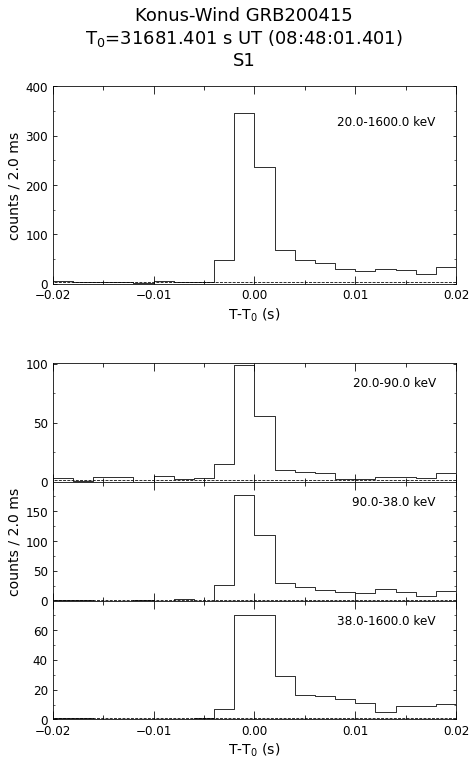

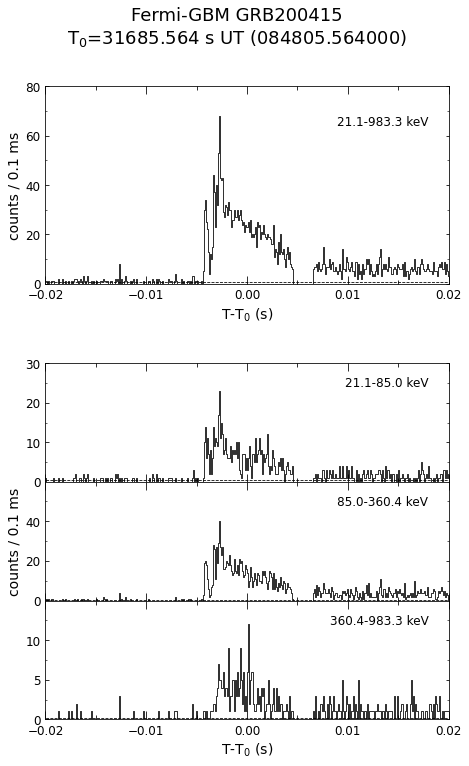

In [8]:
# Plot data
lst_chan = 'G1 G2 G3'.split()

kw_bg = np.zeros(4)
for i, ch in enumerate(lst_chan):
    kw_lcs[ch].set_bg_times(-0.1, -0.05)
    kw_bg[i+1] = kw_lcs[ch].bg_cnt
kw_bg[0] = np.sum(kw_bg[1:])

gbm_bg = np.zeros(4)
for i, ch in enumerate(lst_chan):
    gbm_lcs[ch].set_bg_times(-0.512, -0.05)
    gbm_bg[i+1] = gbm_lcs[ch].bg_cnt
gbm_bg[0] = np.sum(gbm_bg[1:])

kw_fig = 'test_kw_2'
kw_caption = kw.make_caption()
cuts = kw.e_min + [kw.e_max[-1],]

kw_plot = Plot('kw_2',  kw_caption, kw_fig, cuts)
kw_plot.plot_th(kw.df['Ti'], kw.df[['Sum', 'G1', 'G2', 'G3']].to_numpy(), kw_bg, [-0.02, 0.02])

gbm_fig = 'test_gbm_01'
gbm_caption = gbm.make_caption()
cuts = gbm.e_min + [gbm.e_max[-1],]

gbm_plot = Plot('gbm_0.1', gbm_caption, gbm_fig, cuts)
gbm_plot.plot_th(gbm.df['Ti'], gbm.df[['Sum', 'G1', 'G2', 'G3']].to_numpy(), gbm_bg, [-0.02, 0.02])


Konus-Wind source interval:      253      256
Fermi-GBM source interval:      955     1039


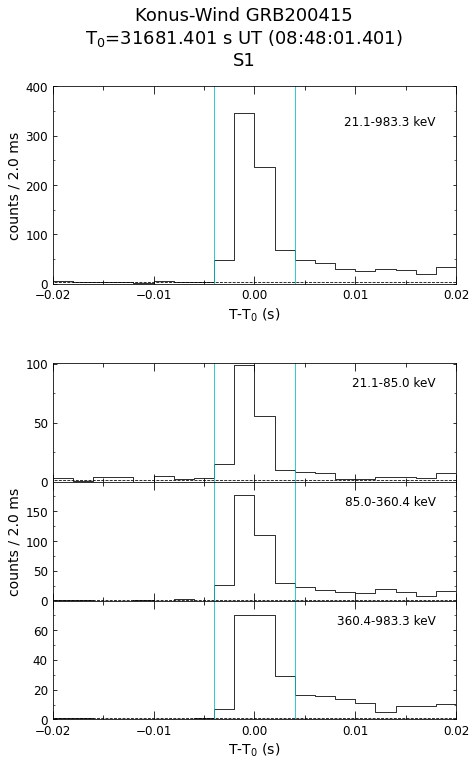

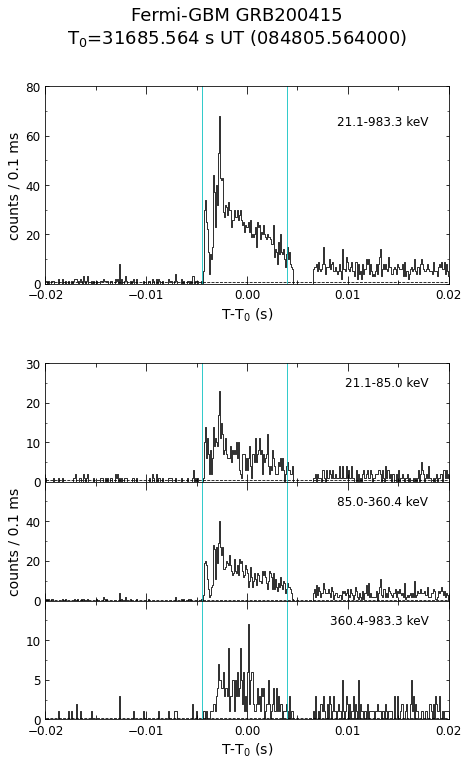

In [15]:
# Select cross-correlation intervals and plot them
# Interval durations should be aproximately equal

kw_cc_interval = {'Ti': -0.004, 'Tf': 0.004}
gbm_cc_interval = {'Ti': -0.0045, 'Tf': 0.004}

kw_ti, kw_tf =  kw_lcs['G3'].set_src_times(kw_cc_interval['Ti'], kw_cc_interval['Tf'])
gbm_ti, gbm_tf =  gbm_lcs['G3'].set_src_times(gbm_cc_interval['Ti'], gbm_cc_interval['Tf'])

# Plot c-c interval selection
 
kw_fig = 'test_kw_2_int'
kw_plot = Plot('kw_2',  kw_caption, kw_fig, cuts)
kw_plot.plot_th(
    kw.df['Ti'], kw.df[['Sum', 'G1', 'G2', 'G3']].to_numpy(), 
    kw_bg, [-0.02, 0.02], t_intervals=[kw_ti, kw_tf])

gbm_fig = 'test_gbm_01_int'
gbm_plot = Plot('gbm_0.1', gbm_caption, gbm_fig, cuts)
gbm_plot.plot_th(
    gbm.df['Ti'], gbm.df[['Sum', 'G1', 'G2', 'G3']].to_numpy(), 
    gbm_bg, [-0.02, 0.02], t_intervals=[gbm_ti, gbm_tf])

GBM i_start, t_start, n_max: 915 -0.009 50

KW idx_strat, idx_end, t_start, t_end: 253 256 -0.004  0.004
Cross-correlation:
dT_cc chi2/dof: 0.0011 0.36
dTlower dTupper fSigma: 0.0006 0.0019 3.427
dTcc dTcc- dTcc+: 0.0011 -0.0005 +0.0008


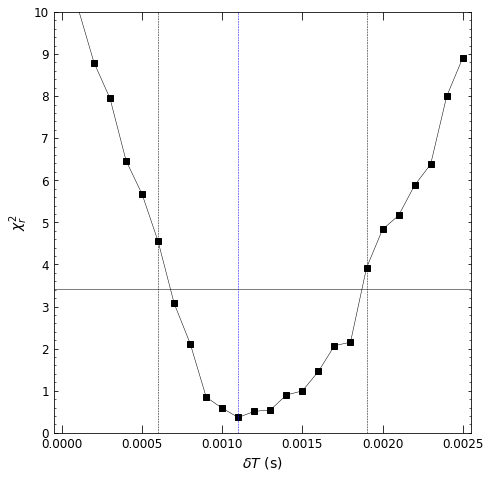

In [16]:
# Calculate cross-correlation time delay
# according to Pal'shin et al., ApJS, 207, 38 (2013)
# https://ui.adsabs.harvard.edu/abs/2013ApJS..207...38P

res_gbm = res_gmb_us / 1e6
res_kw = res_kw_us / 1e6

scale = gbm_lcs['G3'].src_cnt / kw_lcs['G3'].src_cnt

# Set bin indexes for cc
i_beg = gbm_lcs['G3'].src_idx_i - 2 * int(res_kw/res_gbm)
i_beg_2 = kw_lcs['G3'].src_idx_i
i_end_2 = kw_lcs['G3'].src_idx_f

# Number of steps calculate chi2
n_max_1 = 50

print("GBM i_start, t_start, n_max: {:d} {:6.3f} {:d}\n".format(
    i_beg, gbm_lcs['G3'].get_times()[i_beg], n_max_1))
print("KW idx_strat, idx_end, t_start, t_end: {:d} {:d} {:6.3f} {:6.3f}".format(
    i_beg_2, i_end_2, kw_lcs['G3'].get_times()[i_beg_2], kw_lcs['G3'].get_times()[i_end_2+1]))

arr_dt, arr_chi, nDOF, fRijMin, dTmin, iMin, nMin = correlate(
       gbm_lcs['G3'].get_times(), 
       gbm_lcs['G3'].get_bg_sub_counts(), 
       gbm_lcs['G3'].get_counts(),
       kw_lcs['G3'].get_times(), 
       kw_lcs['G3'].get_bg_sub_counts(), 
       kw_lcs['G3'].get_counts(),
       i_beg_2-1, 
       i_end_2+1, 
       i_beg, 
       n_max_1, 
       scale, 
       res_gbm, 
       res_kw)

print("Cross-correlation:\ndT_cc chi2/dof: {:.4f} {:.2f}".format(dTmin, fRijMin))

dTlower, dTupper, fSigma = get_dTcc(arr_dt, arr_chi, nDOF, fRijMin, nMin, nSigma=3)

print("dTlower dTupper fSigma: {:.4f} {:.4f} {:.3f}".format(dTlower, dTupper, fSigma))
print("dTcc dTcc- dTcc+: {:.4f} {:+.4f} {:+.4f}".format(dTmin, dTlower-dTmin, dTupper-dTmin))

fig_file_name = 'ccGBM{:d}KW{:d}.png'.format(res_gmb_us, res_kw_us)
plot_cc(arr_dt, arr_chi, (dTlower, dTupper), fSigma, dTmin, fig_file_name)

Cross-correlation:
dT_cc chi2/dof: 0.0013 0.83
dTlower dTupper fSigma: 0.0006 0.0019 6.840
dTcc dTcc- dTcc+: 0.0013 -0.0007 +0.0006


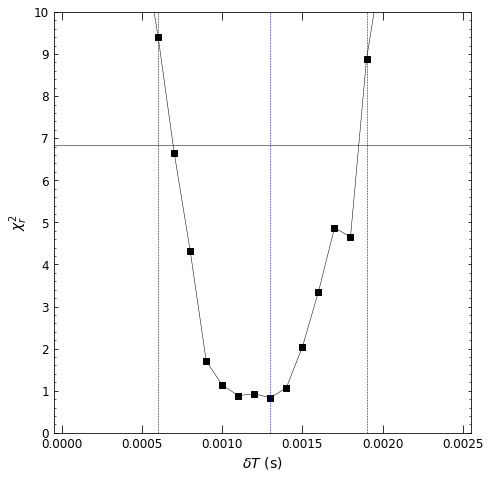

In [17]:
# Calculate cross-correlation time delay rebinning KW data to 4 ms to have more counts per bin
# The result does not significantly different from the privious result.
 
arr_dt, arr_chi, nDOF, fRijMin, dTmin, iMin, nMin = correlate(
       gbm_lcs['G3'].get_times(), 
       gbm_lcs['G3'].get_bg_sub_counts(), 
       gbm_lcs['G3'].get_counts(),
       kw_lcs['G3'].get_times(), 
       kw_lcs['G3'].get_bg_sub_counts(), 
       kw_lcs['G3'].get_counts(),
       i_beg_2-1, 
       i_end_2+1, 
       i_beg, 
       n_max_1, 
       scale, 
       res_gbm, 
       res_kw,
       n_sum_2=2)

print("Cross-correlation:\ndT_cc chi2/dof: {:.4f} {:.2f}".format(dTmin, fRijMin))

dTlower, dTupper, fSigma = get_dTcc(arr_dt, arr_chi, nDOF, fRijMin, nMin, nSigma=3)

print("dTlower dTupper fSigma: {:.4f} {:.4f} {:.3f}".format(dTlower, dTupper, fSigma))
print("dTcc dTcc- dTcc+: {:.4f} {:+.4f} {:+.4f}".format(dTmin, dTlower-dTmin, dTupper-dTmin))

fig_file_name = 'ccGBM{:d}KW{:d}.png'.format(res_gmb_us, res_kw_us)
plot_cc(arr_dt, arr_chi, (dTlower, dTupper), fSigma, dTmin, fig_file_name)

From the second plot, the cross-correlation time delay is
dT_cc = 1.3 +/- 0.6 ms at 3 sigma confidence level. 
For the paper Svinkin et al., Natur 589, 211 (2021;
https://ui.adsabs.harvard.edu/abs/2021Natur.589..211S)
we add 1 ms systematic (dT_cc = 1.3 +/- 1.6 ms) to derive Konus-GBM annulus.